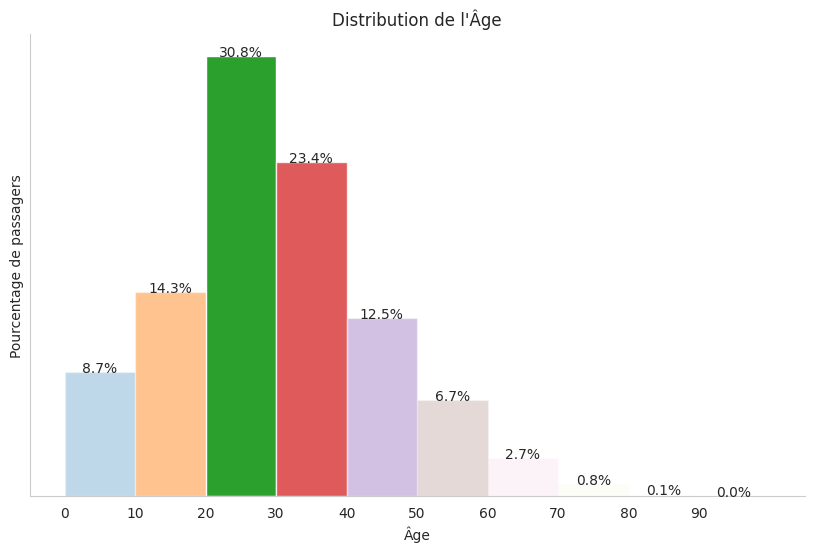

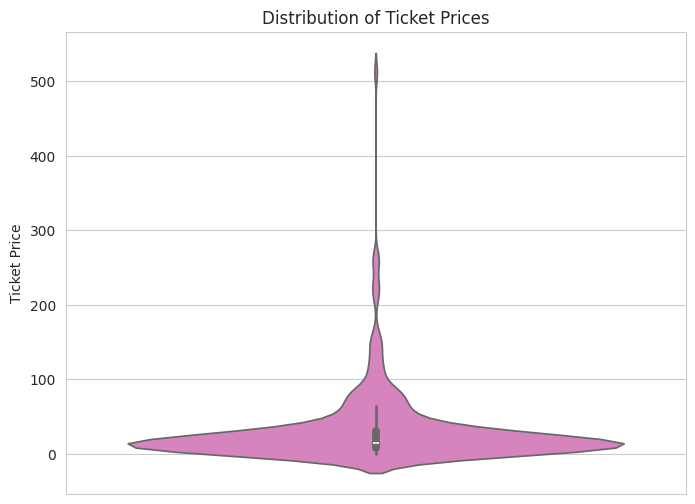

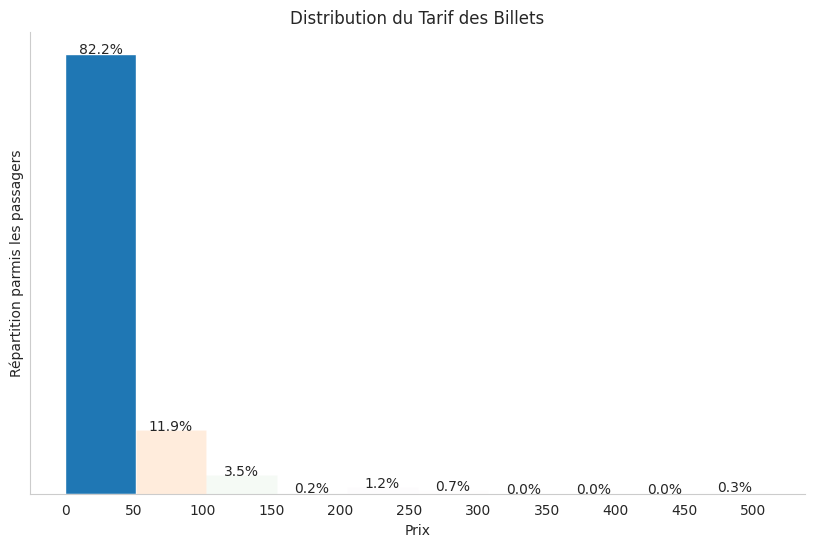

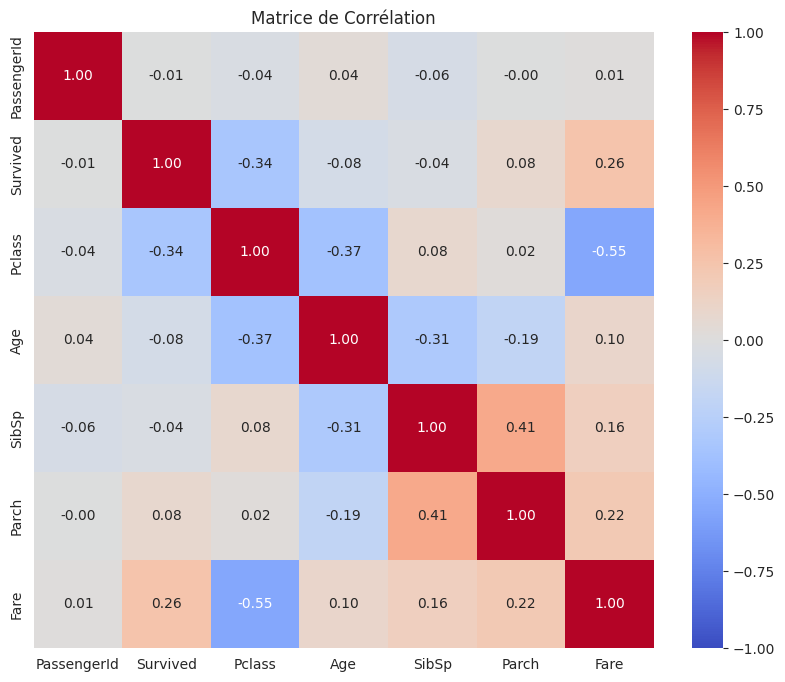

In [1]:
# pretraitement des données -> V0 PRETRAITEMENT 
preprocessing_script_path = '/home/charlemagne/workspace/kaggle_challenge_titanic/dev/pre_processing/0_preprocessing.ipynb'
%run $preprocessing_script_path

In [8]:
# chemins vers les données
test_data_path = '/home/charlemagne/workspace/kaggle_challenge_titanic/data/test.csv'
submission_file_path = '/home/charlemagne/workspace/kaggle_challenge_titanic/submission/0_model_randomForestClassifier.csv'

test_data = pd.read_csv(test_data_path)

In [9]:
# choix du modèle
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [10]:
# création d'un pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

# séparation des jeux de données 
y = train_data_cleaned['Survived']
X = train_data_cleaned.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# entrainement du modèle
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [12]:
# prédictions et évaluations 
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8603351955307262

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       110
           1       0.87      0.75      0.81        69

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [13]:
# prétraitement du data set de test
test_data_cleaned = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data_cleaned['Age'].fillna(test_data_cleaned['Age'].mean(), inplace=True)
test_data_cleaned['Embarked'].fillna(test_data_cleaned['Embarked'].mode()[0], inplace=True)

# extraction de l'id passager du fichier de soumission
passenger_ids = test_data_cleaned['PassengerId']

# préparation des données de test pour la soumission
X_test = test_data_cleaned.drop('PassengerId', axis=1)

# génération des prédictions
test_predictions = clf.predict(X_test)

# création d'un dataframe pour la soumission 
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions
})

In [14]:
# sauvegarde dans le fichiers csv
submission_df.to_csv(submission_file_path, index=False)
submission_df.head() 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
